# Homework 1: Machine numbers; Interpolation

Due April 11th

## (1) Floating point representation

[Floating Point Representation](https://en.wikipedia.org/wiki/Single-precision_floating-point_format)

Comment on why the numbers you get are expected based on the IEEE 754 representation



In [173]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# (1a)

a) Smallest $\epsilon$ such that $1.0-\epsilon \neq 1.0$ 

In [174]:
n=0.0
eps = 2
while 1-eps != 1:
    smallest_eps = eps
    n -= 1.0
    eps = 2**float(n)
smallest_eps

1.1102230246251565e-16

In [175]:
2**(-53) #eps
#np.finfo(float).eps

1.1102230246251565e-16

# (1b)

b) Smallest $\epsilon$ such that $1.0+\epsilon \neq 1.0$ 

In [176]:
n=1.0
eps = 2
while 1+eps != 1.0:
    smallest_eps = eps
    n -= 1.0
    eps = 2**float(n)
    
smallest_eps


2.220446049250313e-16

In [177]:
#2**(-53)
# eps = 2
# while 1+eps != 1:
#     smallest_eps = eps
#     eps = eps*(0.99999)
# smallest_eps

# (1c)

c) The maximum representable positive number


In [178]:
n = 2.0 #1e1
num = 1.0
while num < float("inf"):
    max_num = num
    n += 1
    num = np.array([2])**(n)
    #num *= 2.0 #1.0001
max_num[0]

8.98846567431158e+307

In [179]:
mantissa = (2-2**(-52))
max_num[0]*mantissa

1.7976931348623157e+308

In [180]:
2.**1023*mantissa

1.7976931348623157e+308

In [181]:
# print("{0:e}".format(2**1023))
# np.array([2.])**1023

# (1d) 

d) The minimum representable positive number

In [182]:
n=2.0
while num > 0.0:
    min_num = num
    n -= 1
    num = 2**(n)
min_num 

5e-324

# (2) Roundoff Error

Numerically evaluate the expression, 

## $$ f(x) = \frac{1-cos(x)}{x^2}$$

in double precision for values of $x$ around $10^{-7}$ and smaller. Explain the difference between the numerical results and the analytic limit as $x\rightarrow0$

### Analytic Solution

#### $ lim_{x\rightarrow 0}$ $f(x) = lim_{x\rightarrow 0} \frac{1-cos(x)}{x^2} $

Use L'Hôpital's Rule:

$ \frac{1-cos(x)}{x^2} \rightarrow\frac{sin(x)}{2x}\rightarrow\frac{cos(x)}{2}$ 

Evaluate function at x=0 so:

$ lim_{x\rightarrow 0} \frac{1-cos(x)}{x^2} = \frac{cos(0)}{2} = \frac{1}{2}$ 

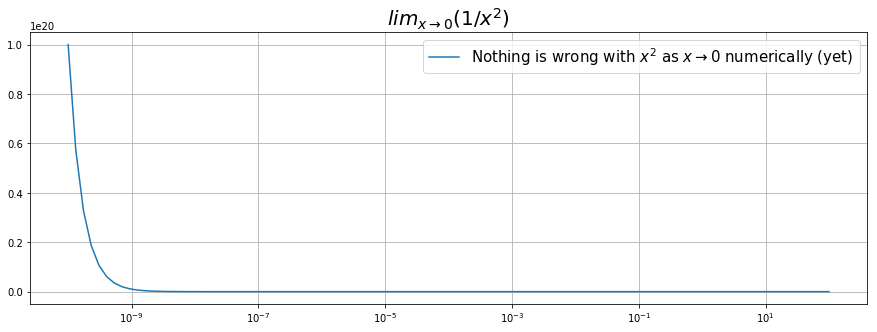

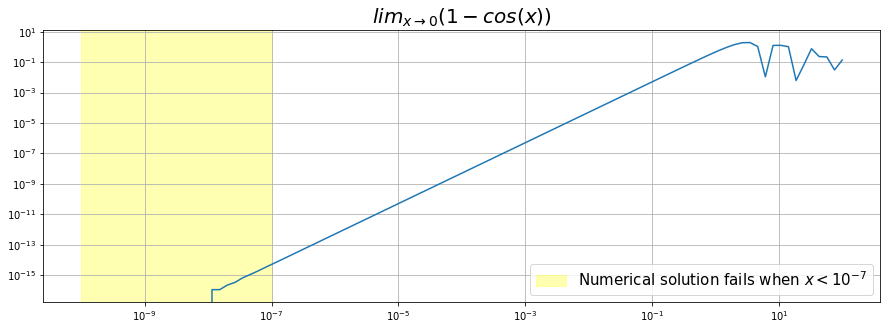

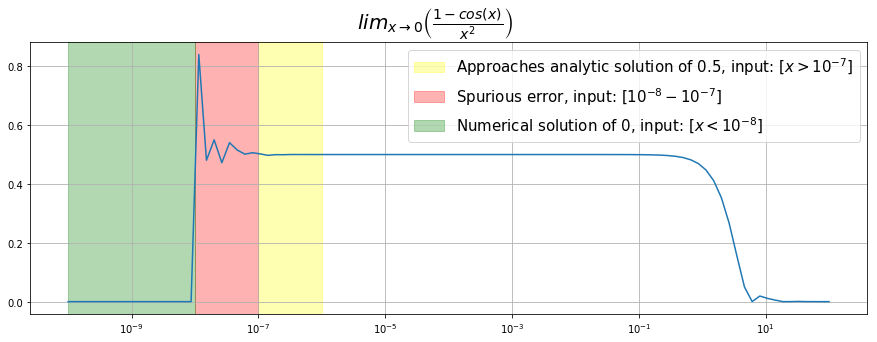

In [354]:
def myfunc(x):
    return (1-np.cos(x))/x**2

x = np.logspace(-10,2,100)

# 1
fig,ax = plt.subplots(1)
fig.set_size_inches(15,5)
ax.grid()
ax.set_title(r'$lim_{x\rightarrow0} (1/x^2)$', fontsize=20)
ax.semilogx(x,1/x**2, label=r"Nothing is wrong with $x^2$ as $x\rightarrow0$ numerically (yet)")
ax.legend(fontsize = 15)
plt.show()

# 2
fig,ax = plt.subplots(1)
fig.set_size_inches(15,5)
ax.grid()
ax.set_title(r'$lim_{x\rightarrow0} \left(1-cos(x)\right)$', fontsize=20)
ax.loglog(x,1-np.cos(x))
ax.axvspan(1e-10, 1e-7, alpha=0.3, color='yellow',label = r'Numerical solution fails when $x<10^{-7}$')
ax.legend(loc='best', fontsize = 15)
plt.show()

# 3
fig,ax = plt.subplots(1)
fig.set_size_inches(15,5)
ax.grid()
plt.suptitle(r'$lim_{x\rightarrow0} \left(\frac{1-cos(x)}{x^2}\right)$', fontsize=20)
#ax.set_title(r'$lim_{x\rightarrow0} \left(\frac{1-cos(x)}{x^2}\right)$', fontsize=15)
ax.semilogx(x,myfunc(x))
ax.axvspan(1e-7, 1e-6, alpha=0.3, color='yellow',label = r'Approaches analytic solution of 0.5, input: $[x>10^{-7}]$')
ax.axvspan(1e-8, 1e-7, alpha=0.3, color='red',label = r'Spurious error, input: $[10^{-8}-10^{-7}]$')
ax.axvspan(1e-10, 1e-8, alpha=0.3, color='green',label = r'Numerical solution of 0, input: $[x<10^{-8}]$')
ax.legend(loc='best', fontsize = 15)
plt.show()

Using L'Hôpital's Rule, the analytic solution is $1/2$. Although the numerical solution is $0$ as $x\rightarrow0$. The reason the numerical solution has problems at values smaller than $10^{-7}$ is the $cos(x)$. Due to the limited precision of numbers represented by my computer, it will round very small numbers. This will cause $1-cos(x)$ to be equal to $0$ since the cosine of a very small number approaches 1 and when it loses precision the computer will represent it as exactly $1$. This is is something astronomers should be vigilant with when dealing with numbers near the limit of computational precision.

# (3) Interpolation

(a) Write a program to read in a two column table from a file and perform
linear interpolation at an arbitrary point [DONE]

(b) Use the program on `hw1.dat`and provide a linear estimate of `y` at `x = 0.75`

(c) Write a program using **Neville’s algorithm** to fit a 4th order polynomial
to the above data and provide an estimate of `y` at `x = 0.75`

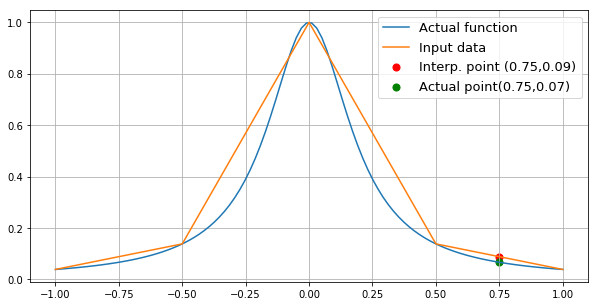

In [385]:
def read_data(file='hw1.dat'):
    data = np.loadtxt(file).T
    return data[0],data[1]

def linear_interp(x,y,arbitrary_point):
    return np.interp(arbitrary_point, x, y)

def actual_function(x):
    return 1/(1+25*x**2)

x,y = read_data()
x_cont,y_cont = np.linspace(-1,1,100),actual_function(np.linspace(-1,1,100))
x_0 = 3/4
y_0 = linear_interp(x,y,x_0)

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(x_cont,y_cont,label='Actual function')
plt.plot(x,y, label='Input data')
plt.scatter([x_0],[y_0],s=50, color='red',
            label='Interp. point ({0:.2f},{1:.2f})'.format(x_0,y_0))
plt.scatter([x_0],actual_function(x_0),s=50, color='green',
            label='Actual point({0:.2f},{1:.2f})'.format(x_0,actual_function(x_0)))
plt.legend(loc='best', fontsize=13)
plt.show()

In [329]:
actual_function(x_0)

0.06639004149377593

1. Order interpolation points in x.
2. Set Pi = yi
3. Determine C1,i, D1,i (linear interpolation)
4. Check convergence
5. If not adaquate construct P01
6. Construct Cm,i, Dm,i
7. Check for convergence, if too large
8. Construct P01...m; loop to 6.
9. If OK, Stop and get error estimate

array([-0.00604468,  0.13793103,  0.28190674,  0.42588246,  0.56985817])

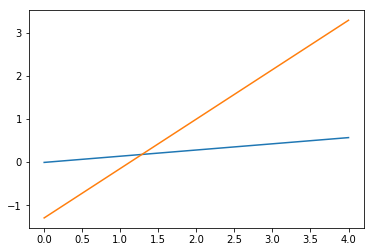

In [454]:
def P_ij(x,i,j):
    if j>=0:
        return ((x-x[j])*P_i[i] + (x[i]-x)*P_i[i+1]/(x[i]-x[j]))
P_i = np.copy(y)
    
plt.plot(P_ij(P_ij(x,0,1),0,1))
# plt.plot(P_ij(x,1,2))
# plt.plot(P_ij(x,2,3))
# plt.plot(P_ij(x,3,4))
# plt.plot(((x-x[1])*P_i[0]+(x[0]-x)*P_i[1])/(x[0]-x[1]))


# 
# i_list = np.linspace(0,len(P_i)-1,len(P_i)).astype(int)
# i_list,x,P_i,

In [413]:
x_input = 3/4
P_01 = (x_input-x[i_list[1]])*P_0

1.75

In [410]:
i_list.astype(int)

array([0, 1, 2, 3, 4])

In [457]:
# 1. The function
actual_function(x)

array([0.03846154, 0.13793103, 1.        , 0.13793103, 0.03846154])

In [458]:
# 2. Evaluate at x=3/4
actual_function(3/4)

0.06639004149377593

In [ ]:
# 3. Zero order approximations. f(3/4) = P_01(3/4)